In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [3]:
# redwine dataset 读取
#读取第一行并去掉多余空白
#按分隔符分割列名
file_path = f'.\dataset\winequality-red-4.csv'
with open(file_path, 'r') as f:
    column_line = f.readline().strip()  
    column_names = column_line.split(";")  

#读取剩余数据
#从第二行开始读取数据
#清洗数据列名称
#设置列名
data = pd.read_csv(file_path, skiprows=1, header=None, sep=";")  
cleaned_columns_name = [value.replace('"', '') for value in column_names] 
data.columns = cleaned_columns_name  

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
missing_values = data.isnull().sum()
print("缺失值情况：\n", missing_values)

缺失值情况：
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
Continuous_value_column=[col for col in data.columns if col != 'quality']


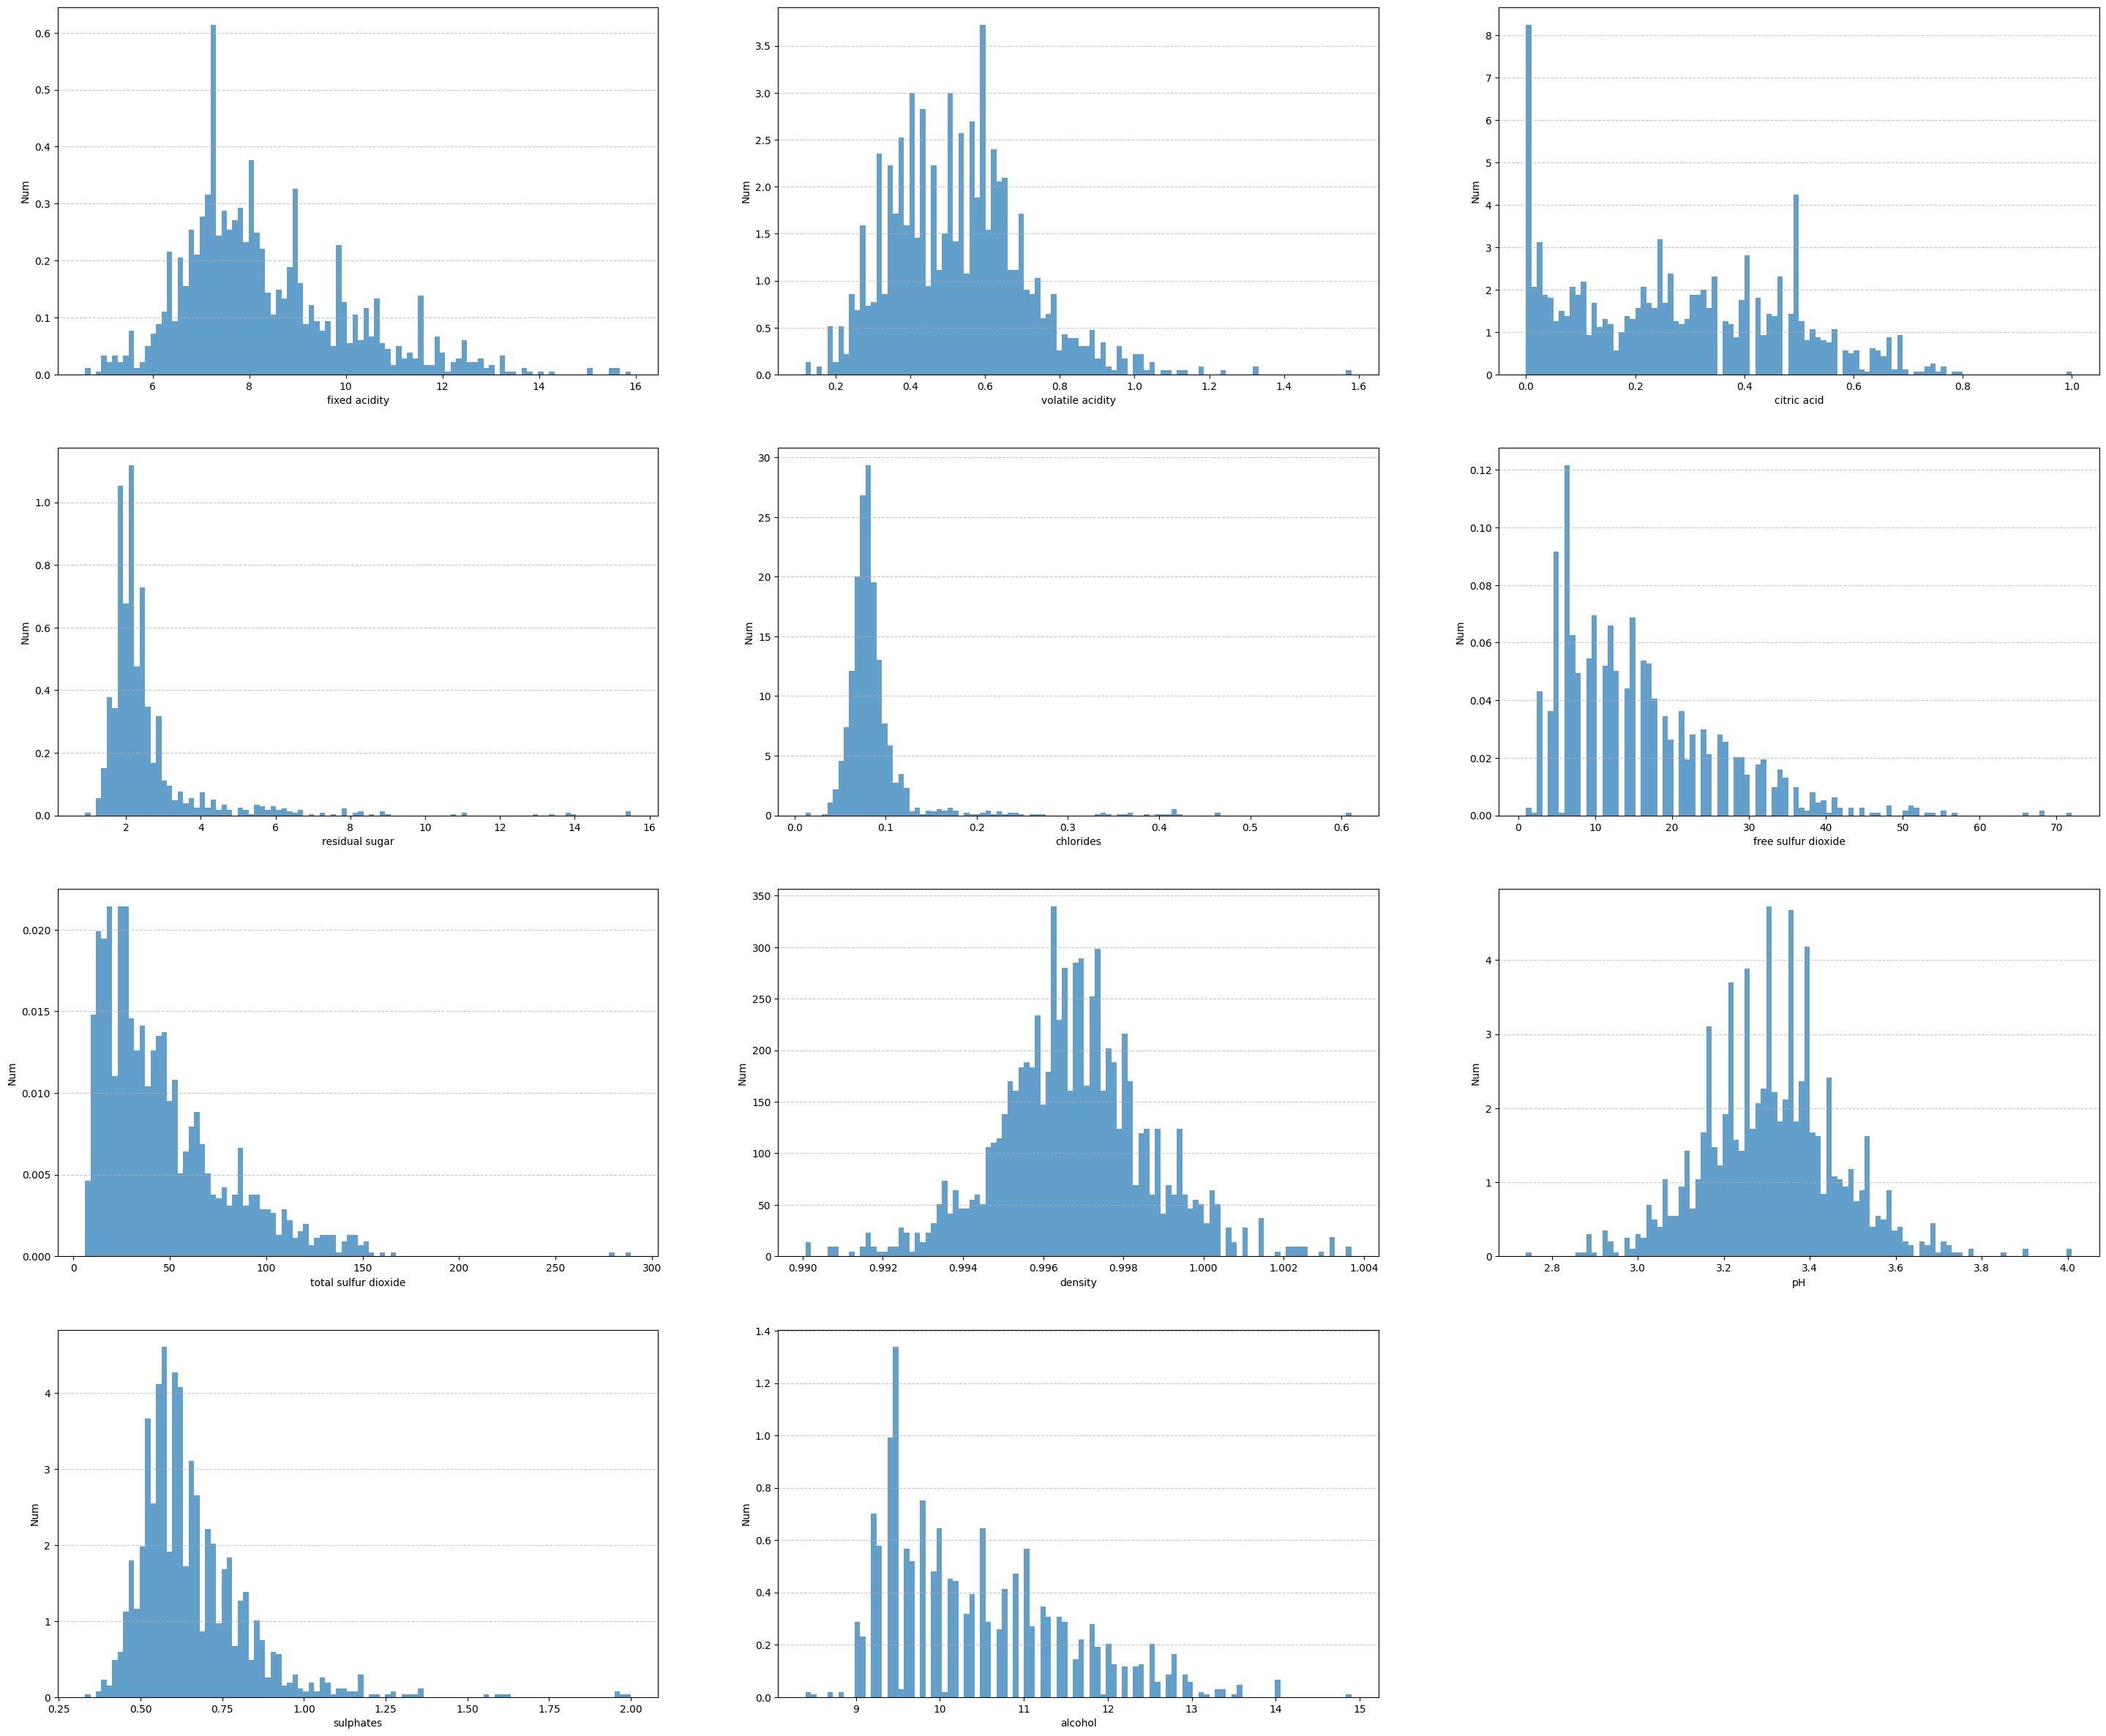

In [7]:
plt.figure(figsize=(36,30))
for i,col in enumerate(Continuous_value_column):
    plt.subplot(4,3,i+1)
    plt.hist(data[col], bins=100, alpha=0.7, label=col, density=True) 
    plt.xlabel(f'{col}')
    plt.ylabel('Num')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[5, 6, 7, 4, 8, 3]


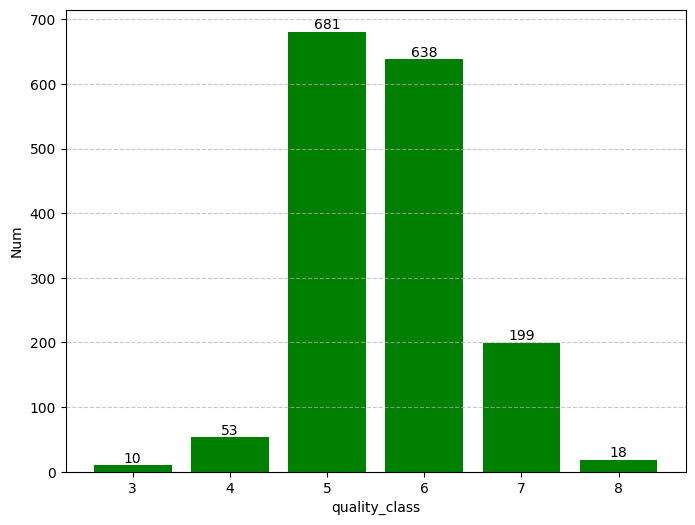

In [8]:
counter=Counter(data['quality'])
values=list(counter.values())
label = list(counter.keys())
plt.figure(figsize=(8,6))
bars=plt.bar(label, values, color='green',tick_label=label)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),                 
        f'{bar.get_height()}',             
        ha='center', va='bottom', fontsize=10  
    )
plt.xlabel('quality_class')
plt.ylabel('Num')
plt.grid(axis='y', linestyle='--', alpha=0.7)
    
print(label)
plt.show()

In [11]:
threshold = 3

# 剔除目标列（quality）以外的列参与计算
# 计算每列的均值和标准差
# 找出所有与均值差距超过阈值的行
# 剔除异常行，保留 quality列

columns_to_clean = data.drop(columns=['quality'])

mean = columns_to_clean.mean()
std = columns_to_clean.std()

outliers = ((columns_to_clean - mean).abs() > threshold * std).any(axis=1)

cleaned_data = data[~outliers].copy()
cleaned_data = cleaned_data.reset_index(drop=True)

In [12]:
cleaned_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1453,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1454,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1455,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1456,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


[5, 6, 7, 4, 8, 3]


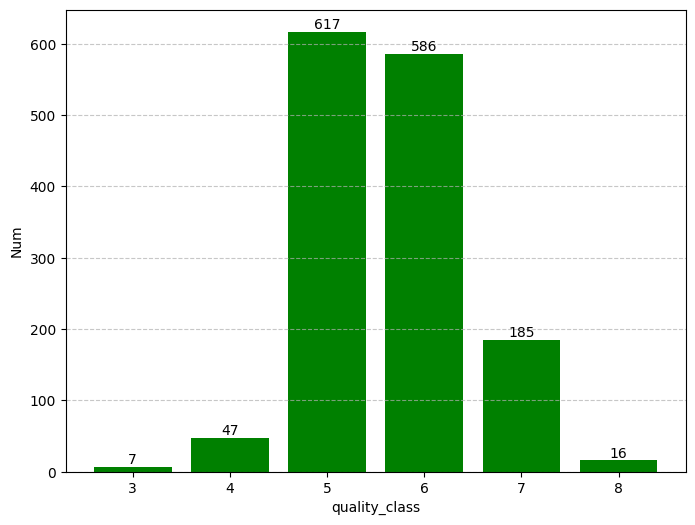

In [13]:
counter=Counter(cleaned_data['quality'])
values=list(counter.values())
label = list(counter.keys())
plt.figure(figsize=(8,6))
bars=plt.bar(label, values, color='green',tick_label=label)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(),                  
        f'{bar.get_height()}',             
        ha='center', va='bottom', fontsize=10 
    )
plt.xlabel('quality_class')
plt.ylabel('Num')
plt.grid(axis='y', linestyle='--', alpha=0.7)
    
print(label)
plt.show()

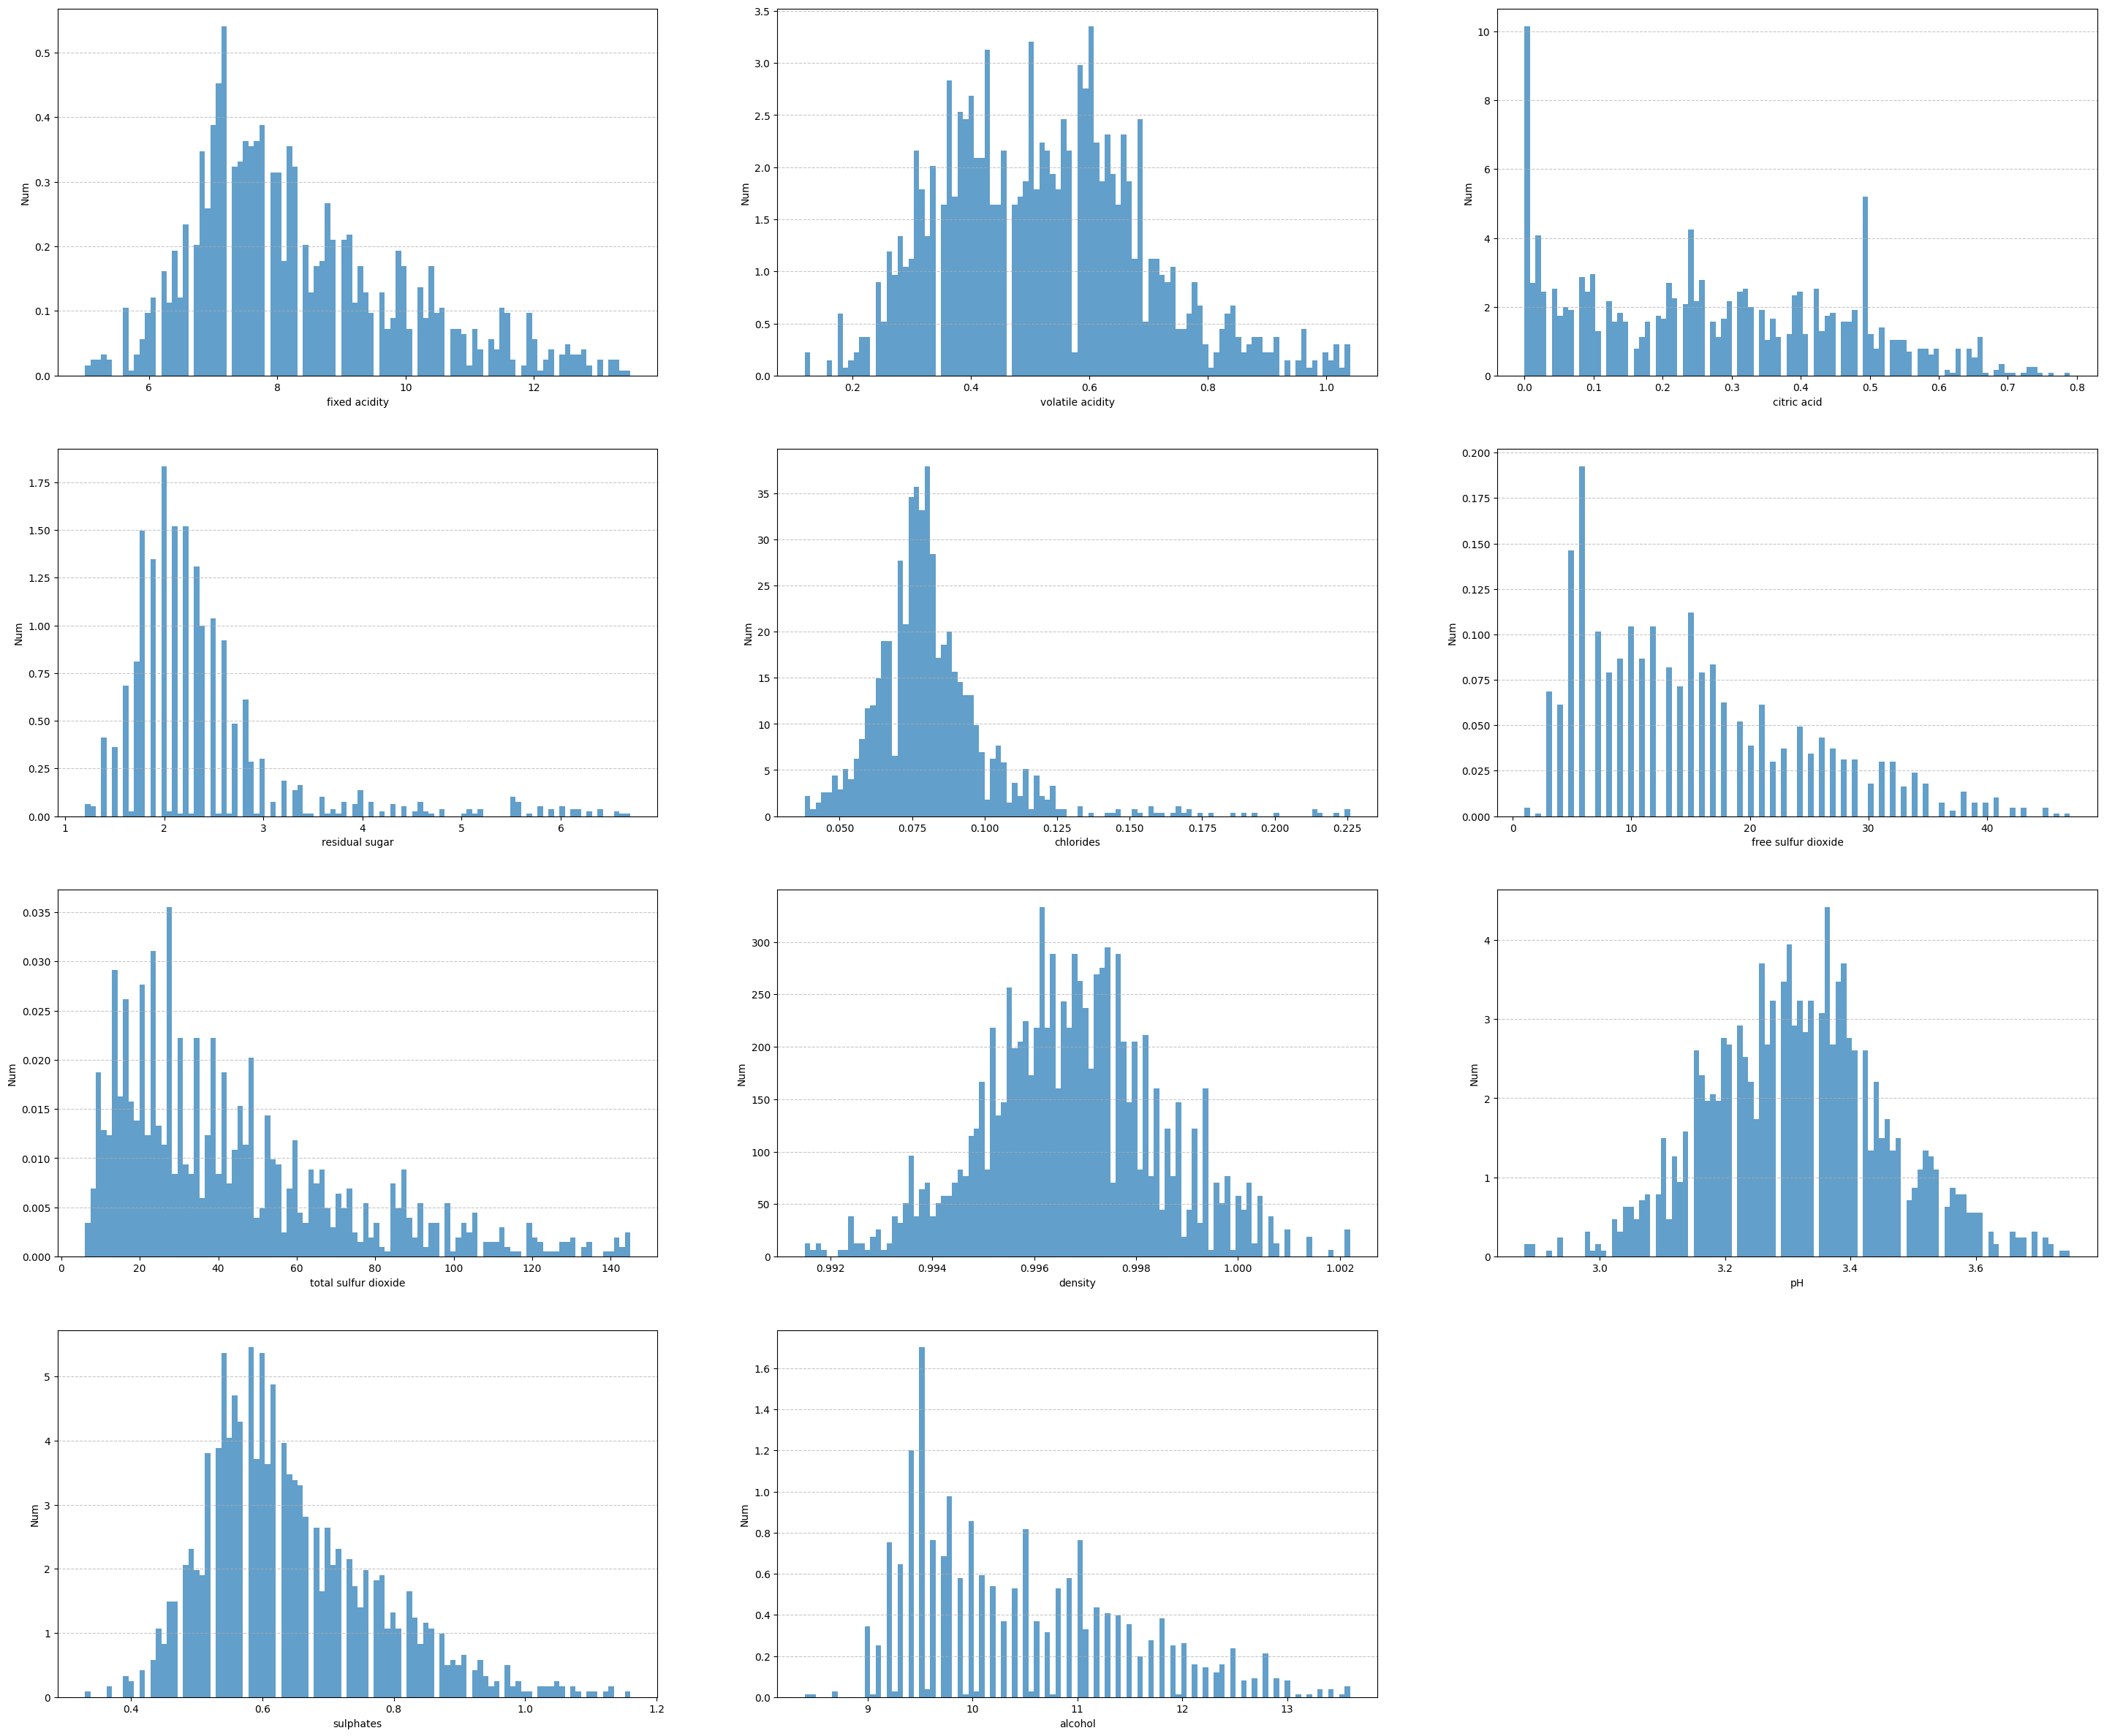

In [14]:
plt.figure(figsize=(36,30))
for i,col in enumerate(Continuous_value_column):
    plt.subplot(4,3,i+1)
    plt.hist(cleaned_data[col], bins=100, alpha=0.7, label=col, density=True) 
    plt.xlabel(f'{col}')
    plt.ylabel('Num')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
train_val_data, test_data = train_test_split(cleaned_data, test_size=0.2, random_state=55,stratify=cleaned_data['quality'])

In [22]:
#根据上图特征的分布情况，将部分特征归一化，部分特征标准化
'''归一化特征 citric acid free sulfur dioxide total sulfur dioxide alcohol'''

Columns_Minmax=['citric acid','free sulfur dioxide','total sulfur dioxide','alcohol']
Columns_normalize=[col for col in Continuous_value_column if col not in Columns_Minmax]

In [23]:
scaler = StandardScaler()
train_val_data[Columns_normalize]= scaler.fit_transform(train_val_data[Columns_normalize])
test_data[Columns_normalize]= scaler.fit_transform(test_data[Columns_normalize])

In [24]:
scaler_2 = MinMaxScaler()
train_val_data[Columns_Minmax]= scaler_2.fit_transform(train_val_data[Columns_Minmax])
test_data[Columns_Minmax]= scaler_2.fit_transform(test_data[Columns_Minmax])

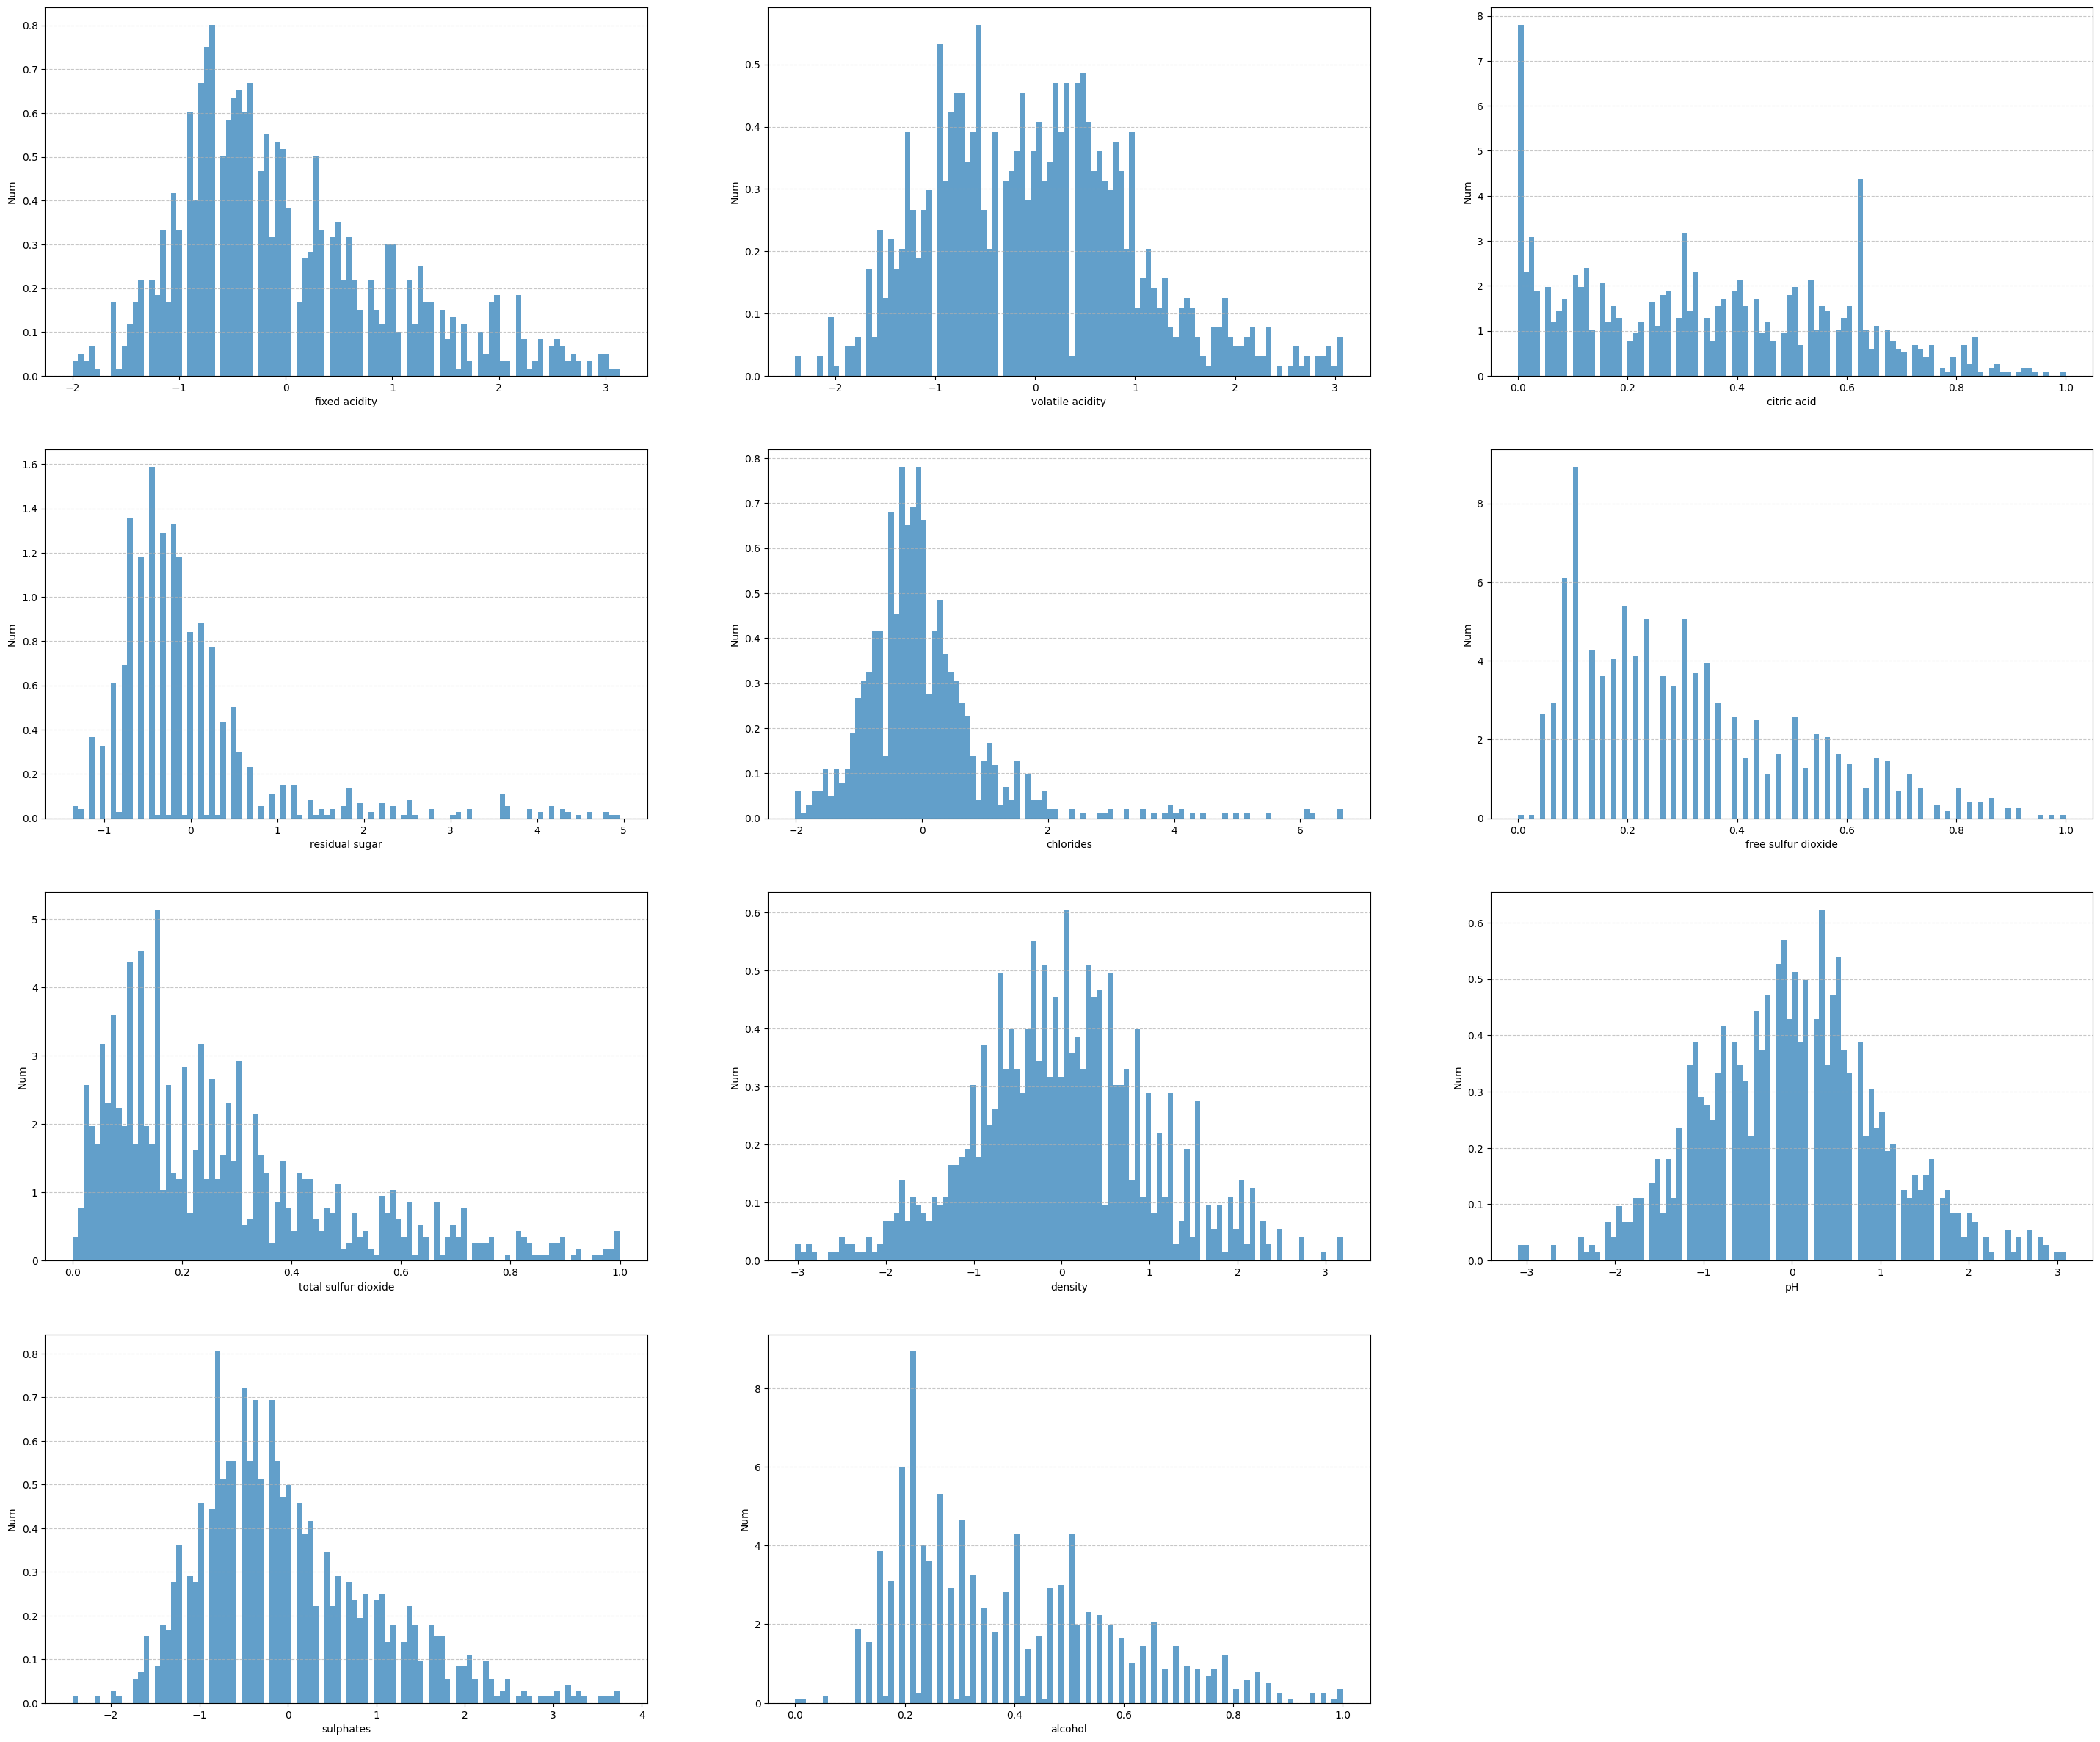

In [25]:
plt.figure(figsize=(36,30))
for i,col in enumerate(Continuous_value_column):
    plt.subplot(4,3,i+1)
    plt.hist(train_val_data[col], bins=100, alpha=0.7, label=col, density=True) 
    plt.xlabel(f'{col}')
    plt.ylabel('Num')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[5, 6, 7, 4, 8, 3]


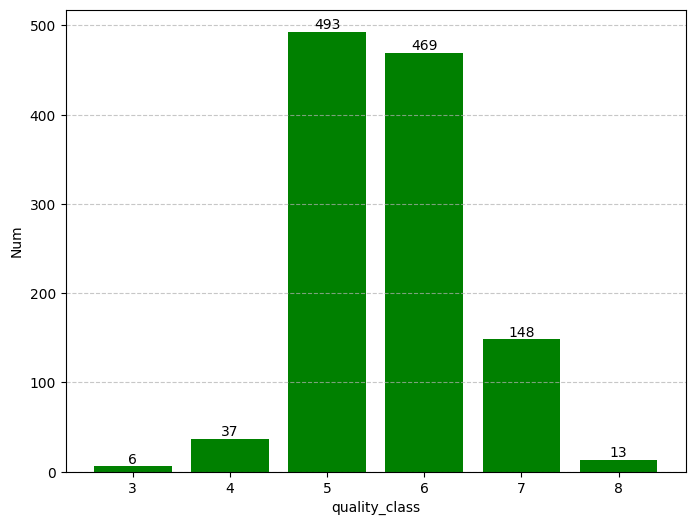

In [26]:
counter=Counter(train_val_data['quality'])
values=list(counter.values())
label = list(counter.keys())
plt.figure(figsize=(8,6))
bars=plt.bar(label, values, color='green',tick_label=label)
# 在每个柱子顶部显示数值
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(),                  
        f'{bar.get_height()}',             
        ha='center', va='bottom', fontsize=10  
    )
plt.xlabel('quality_class')
plt.ylabel('Num')
plt.grid(axis='y', linestyle='--', alpha=0.7)
    
print(label)
plt.show()

In [27]:
train_val_data.to_csv("./dataset/train_val_data.csv", index=False)
test_data.to_csv("./dataset/test_data.csv", index=False)

In [28]:
correlation_matrix = train_val_data.corr()

In [29]:
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.298442,0.694411,0.176996,0.193477,-0.154162,-0.095100,0.667733,-0.698222,0.200222,-0.027732,0.130129
volatile acidity,-0.298442,1.000000,-0.589030,0.042129,0.074038,0.009925,0.103610,-0.002568,0.259103,-0.358433,-0.210403,-0.367388
citric acid,0.694411,-0.589030,1.000000,0.174421,0.099016,-0.070989,0.021995,0.377311,-0.506599,0.299544,0.158811,0.228575
residual sugar,0.176996,0.042129,0.174421,1.000000,0.125540,-0.005724,0.104507,0.351051,-0.073379,0.064467,0.160311,0.074180
chlorides,0.193477,0.074038,0.099016,0.125540,1.000000,-0.071603,0.037607,0.340064,-0.177122,0.019450,-0.208257,-0.128932
free sulfur dioxide,-0.154162,0.009925,-0.070989,-0.005724,-0.071603,1.000000,0.654567,-0.050243,0.117185,0.072481,-0.058125,-0.078138
total sulfur dioxide,-0.095100,0.103610,0.021995,0.104507,0.037607,0.654567,1.000000,0.123091,-0.010719,-0.038337,-0.253665,-0.242274
density,0.667733,-0.002568,0.377311,0.351051,0.340064,-0.050243,0.123091,1.000000,-0.316929,0.116521,-0.467740,-0.185747
pH,-0.698222,0.259103,-0.506599,-0.073379,-0.177122,0.117185,-0.010719,-0.316929,1.000000,-0.042781,0.156574,-0.081741
sulphates,0.200222,-0.358433,0.299544,0.064467,0.019450,0.072481,-0.038337,0.116521,-0.042781,1.000000,0.236423,0.377663


In [30]:
# 提取相关系数绝对值大于 0.6 的特征对（排除对角线）
threshold = 0.6
high_corr = correlation_matrix.abs() > threshold
high_corr_pairs = high_corr.where(np.triu(np.ones(high_corr.shape), k=1).astype(bool))

feature_pairs = [
    (correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
    for i in range(len(high_corr_pairs))
    for j in range(i + 1, len(high_corr_pairs))
    if high_corr_pairs.iloc[i, j]
]

print("相关性绝对值大于 0.6 的特征对：")
for pair in feature_pairs:
    print(f"{pair[0]} 和 {pair[1]} 的相关系数为 {pair[2]:.2f}")

相关性绝对值大于 0.6 的特征对：
fixed acidity 和 citric acid 的相关系数为 0.69
fixed acidity 和 density 的相关系数为 0.67
fixed acidity 和 pH 的相关系数为 -0.70
free sulfur dioxide 和 total sulfur dioxide 的相关系数为 0.65


In [57]:
#将相关度高的特征降维
train_val_data_pca=pd.DataFrame()
test_data_pca=pd.DataFrame()
pca = PCA(n_components=1)
for pair in feature_pairs:
    train_val_data_pca_0=train_val_data[[pair[0],pair[1]]].copy()
    test_data_pca_0=test_data[[pair[0],pair[1]]].copy()
    train_val_data_pca[pair[0]+pair[1]]=pd.Series(pca.fit_transform(train_val_data_pca_0).ravel(),index=train_val_data_pca_0.index)
    test_data_pca[pair[0]+pair[1]]=pd.Series(pca.fit_transform(test_data_pca_0).ravel(),index=test_data_pca_0.index)




In [59]:
PCA_feature=['fixed acidity','citric acid','density','pH','free sulfur dioxide','total sulfur dioxide']

In [60]:
Columns_save=[col for col in data.columns if col not in PCA_feature]

In [61]:
train_val_data_pca[Columns_save]=train_val_data[Columns_save]
test_data_pca[Columns_save]=test_data[Columns_save]


In [67]:
train_val_data_pca.to_csv("./dataset/train_val_data_pca-9.csv", index=False)
test_data_pca.to_csv("./dataset/test_data_pca-9.csv", index=False)

In [71]:
#另一种降维（将'fixed acidity','citric acid','density','pH'一起降维，'free sulfur dioxide','total sulfur dioxide'一起降维）
train_val_data_pca_7=pd.DataFrame()
test_data_pca_7=pd.DataFrame()
pca= PCA(n_components=1)
train_val_data_pca_1=train_val_data[['fixed acidity','citric acid','density','pH']].copy()
test_data_pca_1=test_data[['fixed acidity','citric acid','density','pH']].copy()
train_val_data_pca_7['fixed acidity citric acid density pH']=pd.Series(pca.fit_transform(train_val_data_pca_1).ravel(),index=train_val_data_pca_1.index)
test_data_pca_7['fixed acidity citric acid density pH']=pd.Series(pca.fit_transform(test_data_pca_1).ravel(),index=test_data_pca_1.index)
train_val_data_pca_2=train_val_data[['free sulfur dioxide','total sulfur dioxide']].copy()
test_data_pca_2=test_data[['free sulfur dioxide','total sulfur dioxide']].copy()
train_val_data_pca_7['sulfur dioxide']=pd.Series(pca.fit_transform(train_val_data_pca_2).ravel(),index=train_val_data_pca_2.index)
test_data_pca_7['sulfur dioxide']=pd.Series(pca.fit_transform(test_data_pca_2).ravel(),index=test_data_pca_2.index)
train_val_data_pca_7[Columns_save]=train_val_data[Columns_save]
test_data_pca_7[Columns_save]=test_data[Columns_save]


In [72]:
train_val_data_pca_7


,fixed acidity citric acid density pH,sulfur dioxide,volatile acidity,residual sugar,chlorides,sulphates,alcohol,quality
1229,-1.670005,-0.217017,-1.208490,-0.674715,0.207058,-1.582975,0.326923,5
591,3.624173,0.047082,-0.732242,-0.444764,0.484246,0.118675,0.346154,5
338,-0.137035,0.134381,0.101193,-0.444764,0.299454,0.737457,0.153846,6
859,0.557986,-0.337845,-1.089428,-0.329789,-1.363670,0.350718,0.711538,7
643,1.516722,0.617306,-0.255994,0.532524,0.576642,-0.886846,0.153846,5
...,...,...,...,...,...,...,...,...
561,0.031408,0.278945,0.964393,-0.099839,1.362006,-0.268064,0.173077,5
517,1.874040,0.018092,-1.268021,-0.214814,-0.855493,-1.041541,0.269231,6
1280,-1.795679,-0.240754,-0.315525,0.015136,-0.485910,0.660109,0.423077,6
349,0.852800,-0.105074,1.440641,-0.099839,-0.809295,-0.732150,0.192308,5


In [73]:
train_val_data_pca_7.to_csv("./dataset/train_val_data_pca-7.csv", index=False)
test_data_pca_7.to_csv("./dataset/test_data_pca-7.csv", index=False)

In [74]:
#集体降维
pca_5=PCA(n_components=5)
train_val_data_pca_5=pd.DataFrame()
test_data_pca_5=pd.DataFrame()
train_val_data_pca_3=train_val_data[Continuous_value_column].copy()
test_data_pca_3=test_data[Continuous_value_column].copy()

In [85]:
train_val_data_pca_5[['feature 1','feature 2','feature 3','feature 4','feature 5']]=  pd.DataFrame(pca_5.fit_transform(train_val_data_pca_3),train_val_data_pca_3.index)
test_data_pca_5[['feature 1','feature 2','feature 3','feature 4','feature 5']]=pd.DataFrame(pca_5.fit_transform(test_data_pca_3),test_data_pca_3.index)

In [86]:
train_val_data_pca_5['quality']=train_val_data['quality']
test_data_pca_5['quality']=test_data['quality']

In [90]:
train_val_data_pca_5.to_csv("./dataset/train_val_data_pca-5.csv", index=False)
test_data_pca_5.to_csv("./dataset/test_data_pca-5.csv", index=False)